In [5]:
from pycocotools import coco
import numpy as np
import skimage.io as io
import matplotlib
import matplotlib.pyplot as plt
import pylab
import random
import cv2
pylab.rcParams['figure.figsize'] = (8.0, 6.0)

rgbAnnFile='./aauRainSnow-rgb.json'
thermalAnnFile = './aauRainSnow-thermal.json'

rainSnowRgbGt = coco.COCO(rgbAnnFile)
rainSnowThermalGt = coco.COCO(thermalAnnFile)

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
loading annotations into memory...
Done (t=0.20s)
creating index...
index created!


## Display a random image with overlayed annotations in both the RGB and thermal domain 


Found 3 annotations at image ID 0. Image file: Egensevej/Egensevej-1/cam1-00055.png
Annotation #0: car
Annotation #1: car
Annotation #2: car

RGB Image


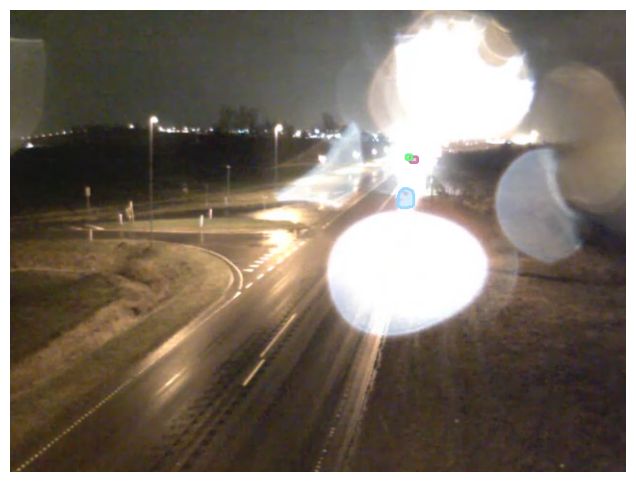


Thermal Image


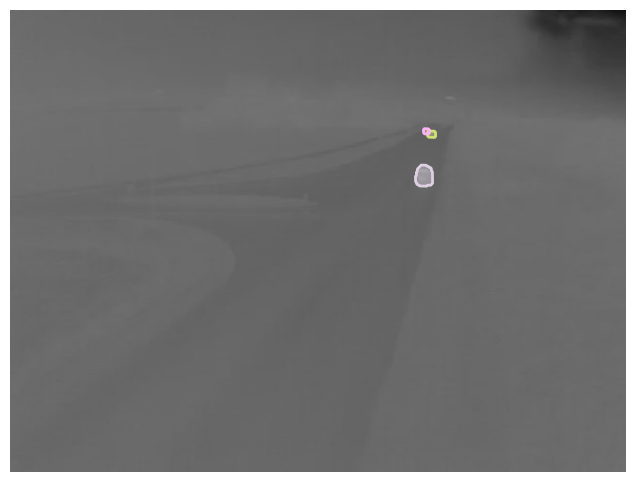

Found 3 annotations at image ID 1. Image file: Egensevej/Egensevej-1/cam1-00141.png
Annotation #3: car
Annotation #4: car
Annotation #5: car

RGB Image


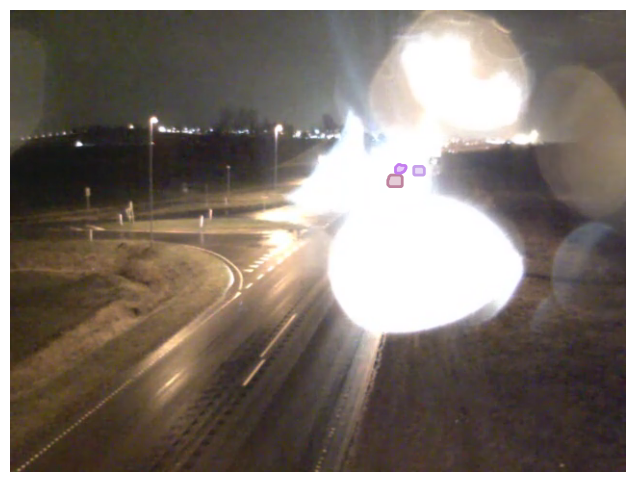


Thermal Image


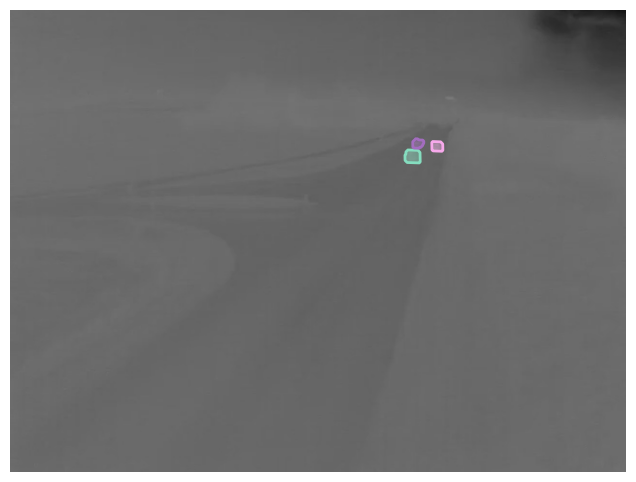

Found 2 annotations at image ID 2. Image file: Egensevej/Egensevej-1/cam1-00218.png
Annotation #6: car
Annotation #7: car

RGB Image


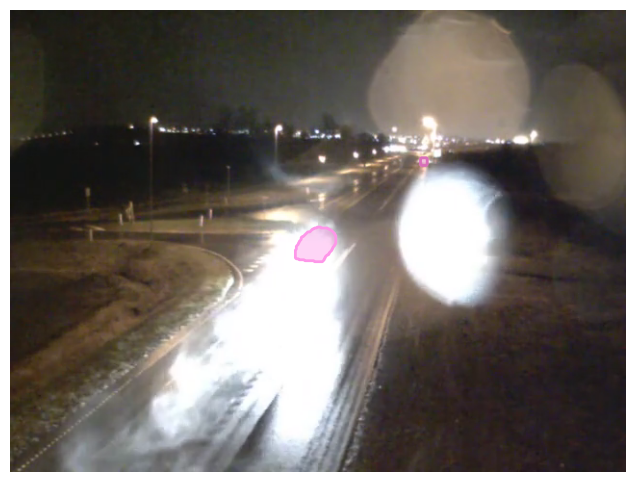


Thermal Image


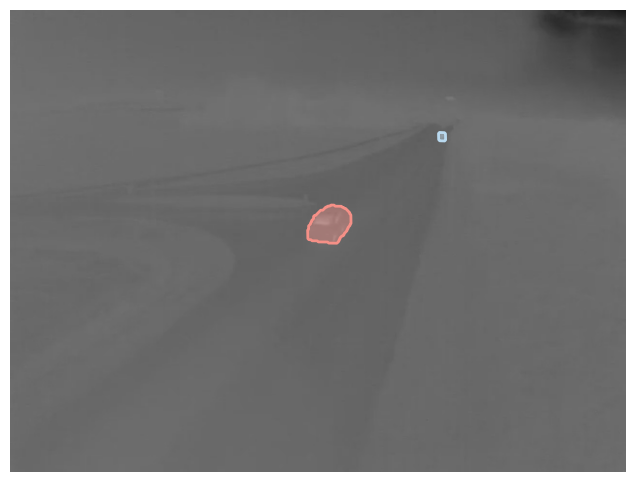

Found 2 annotations at image ID 3. Image file: Egensevej/Egensevej-1/cam1-00219.png
Annotation #8: car
Annotation #9: car

RGB Image


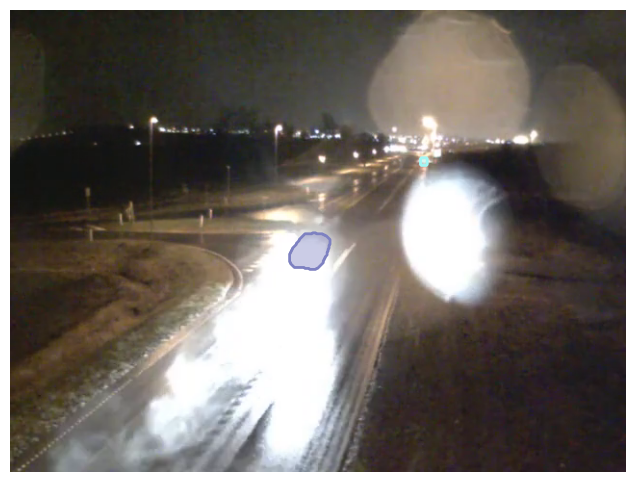


Thermal Image


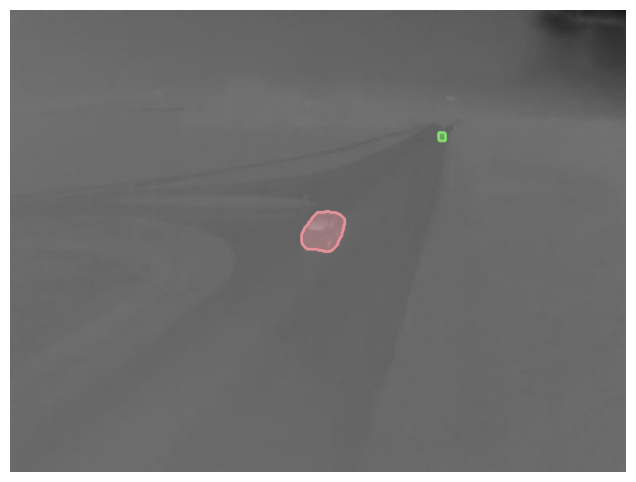

Found 2 annotations at image ID 4. Image file: Egensevej/Egensevej-1/cam1-00223.png
Annotation #10: car
Annotation #11: car

RGB Image


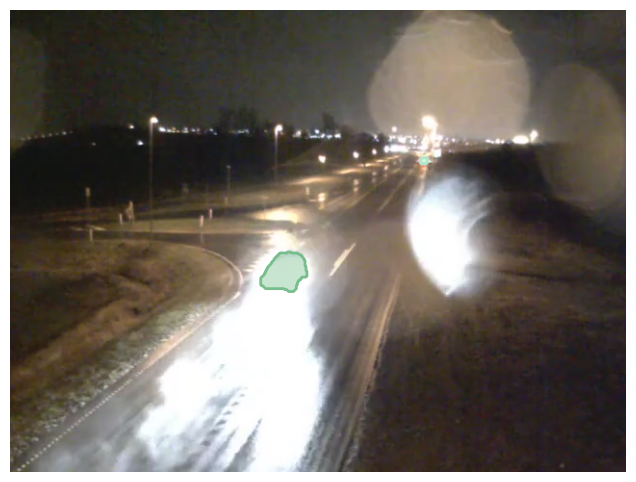


Thermal Image


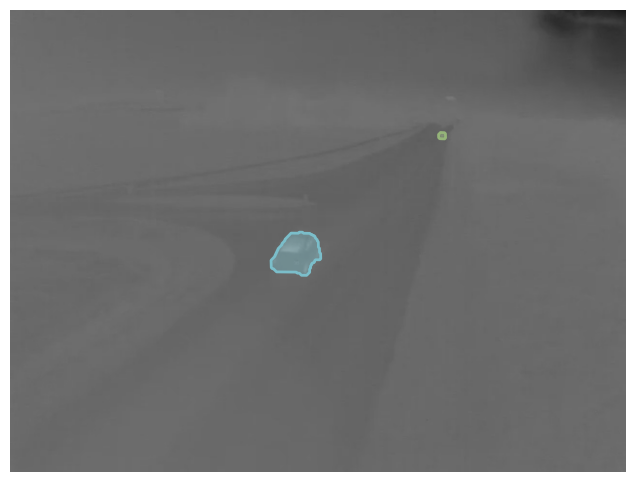

Found 0 annotations at image ID 5. Image file: Egensevej/Egensevej-1/cam1-00447.png

RGB Image


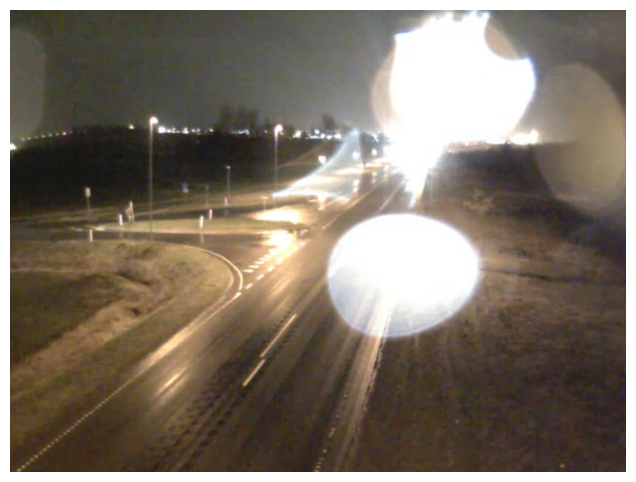


Thermal Image


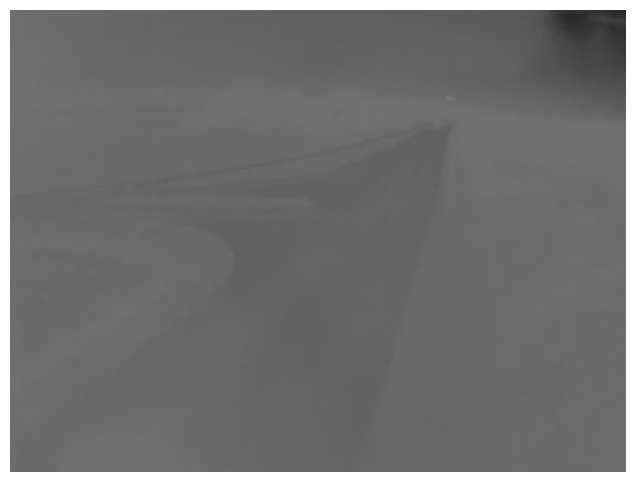

Found 4 annotations at image ID 6. Image file: Egensevej/Egensevej-1/cam1-00576.png
Annotation #12: car
Annotation #13: car
Annotation #14: car
Annotation #15: car

RGB Image


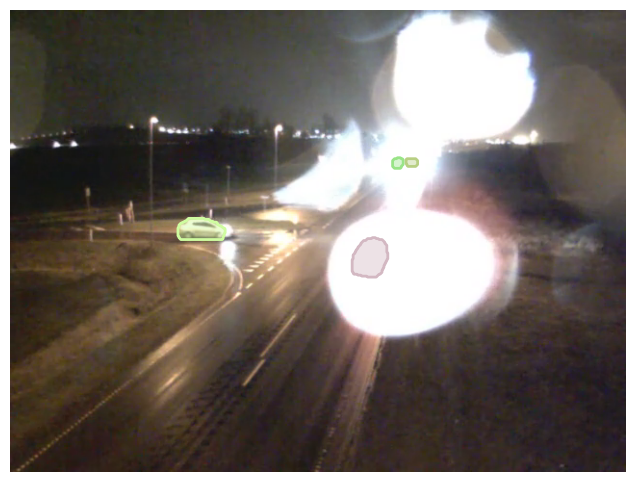


Thermal Image


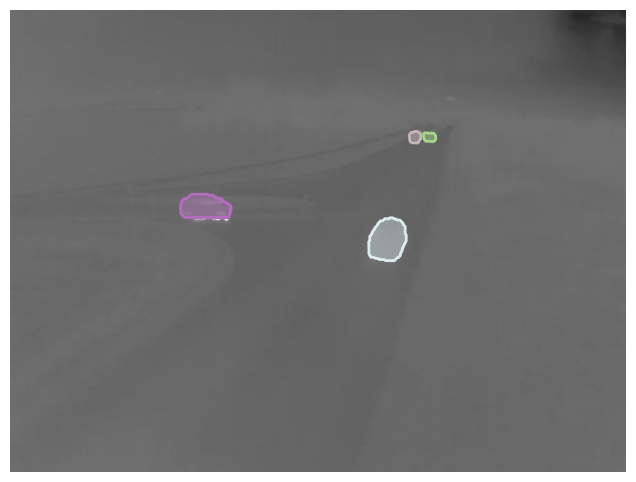

Found 6 annotations at image ID 7. Image file: Egensevej/Egensevej-1/cam1-00609.png
Annotation #16: car
Annotation #17: car
Annotation #18: car
Annotation #19: car
Annotation #20: car
Annotation #21: car

RGB Image


KeyboardInterrupt: 

In [15]:
for i in range(0, 2197):
    chosenImgId = i
    annIds = rainSnowRgbGt.getAnnIds(imgIds=[chosenImgId])
    anns = rainSnowRgbGt.loadAnns(annIds)

    rgbImg = rainSnowRgbGt.loadImgs([chosenImgId])[0]
    thermalImg = rainSnowThermalGt.loadImgs([chosenImgId])[0]
    thermalAnns = rainSnowThermalGt.loadAnns(annIds)

    print('Found ' + str(len(anns)) + ' annotations at image ID ' + str(chosenImgId) + '. Image file: ' + rgbImg['file_name'])

    for ann in anns:
        print('Annotation #' + str(ann['id']) + ': ' + rainSnowRgbGt.loadCats(ann['category_id'])[0]['name'])

    matplotlib.rcParams['interactive'] == False
    print("\nRGB Image")
    I = io.imread('./' + rgbImg['file_name'])
    plt.gcf().clear()
    plt.axis('off')
    plt.imshow(I);
    rainSnowRgbGt.showAnns(anns)
    plt.show()

    # For some reason, the image won't show in some Windows/Anaconda configurations. If this is the case, print the image instead
    plt.savefig("Samples/rgb-" + str(chosenImgId).zfill(5) + ".png")

    print("\nThermal Image")
    # Load thermal annotations
    I = io.imread('./' + thermalImg['file_name'])
    plt.gcf().clear()
    plt.axis('off')
    plt.imshow(I);
    rainSnowThermalGt.showAnns(thermalAnns)
    plt.show()

    plt.savefig("Samples/thermal-" + str(chosenImgId).zfill(5) + ".png")



## Register an annotation in RGB to the thermal domain

In [14]:
import aauRainSnowUtility

chosenImgId = random.randint(0, 2197)
annIds = rainSnowRgbGt.getAnnIds(imgIds=[chosenImgId])
anns = rainSnowRgbGt.loadAnns(annIds)
rgbImg = rainSnowRgbGt.loadImgs([chosenImgId])[0]


if len(anns) > 0:
    chosenAnnId = random.randint(0, len(anns)-1)
    rgbAnn = anns[chosenAnnId]
    
    thermalSegmentation = []
    for segmentation in rgbAnn['segmentation']:
        thermalCoords = aauRainSnowUtility.registerRgbPointsToThermal(segmentation, rgbImg['file_name'])
        
        
        thermalSegmentation.append(thermalCoords)
        
        print('RGB coordinates for annotation ID ' + str(rgbAnn['id']) +':\n' + str(np.reshape(segmentation, (-1, 2))))
        print('Thermal coordinates:\n' + str(thermalCoords.reshape([-1, 2])))    
    
else:
    print("No annotations found for image ID " + str(chosenImgId) + ", try again")



Reading calibration file at: Egensevej\Egensevej-1-calib.yml
RGB coordinates for annotation ID 68:
[[392 173]
 [388 177]
 [388 178]
 [387 179]
 [387 180]
 [386 181]
 [386 183]
 [388 185]
 [389 185]
 [391 187]
 [396 187]
 [397 186]
 [398 186]
 [399 185]
 [399 184]
 [400 183]
 [400 182]
 [401 181]
 [401 180]
 [402 179]
 [402 174]
 [401 173]]
Thermal coordinates:
[[409.76434 146.98126]]


## Register an annotation in thermal to the RGB domain

In [ ]:
import aauRainSnowUtility

chosenImgId = random.randint(0, 2197)
annIds = rainSnowThermalGt.getAnnIds(imgIds=[chosenImgId])
anns = rainSnowThermalGt.loadAnns(annIds)
thermalImg = rainSnowThermalGt.loadImgs([chosenImgId])[0]


if len(anns) > 0:
    chosenAnnId = random.randint(0, len(anns)-1)
    thermalAnn = anns[chosenAnnId]
    
    rgbSegmentation = []
    for segmentation in thermalAnn['segmentation']:
        rgbCoords = aauRainSnowUtility.registerThermalPointsToRgb(segmentation, thermalImg['file_name'])
        
        
        rgbSegmentation.append(rgbCoords)
        
        print('Thermal coordinates for annotation ID ' + str(thermalAnn['id']) +':\n' + str(np.reshape(segmentation, (-1, 2))))
        print('RGB coordinates:\n' + str(rgbCoords.reshape([-1, 2])))    
    
else:
    print("No annotations found for image ID " + str(chosenImgId) + ", try again")

Reading calibration file at: Egensevej\Egensevej-2-calib.yml
Thermal coordinates for annotation ID 635:
[[ 402.4324646   148.91531372]
 [ 399.33529663  152.08862305]
 [ 399.57357788  163.01705933]
 [ 400.65356445  164.14190674]
 [ 411.19351196  164.46409607]
 [ 412.22225952  163.40609741]
 [ 413.27252197  163.43945312]
 [ 414.30007935  162.38244629]
 [ 414.09228516  152.5723114 ]
 [ 413.0178833   151.44709778]
 [ 412.99359131  150.35762024]
 [ 411.9180603   149.23225403]]
RGB coordinates:
[[ 385.          175.        ]
 [ 382.          178.        ]
 [ 382.          188.        ]
 [ 383.          189.        ]
 [ 393.          189.        ]
 [ 394.          188.        ]
 [ 395.          188.        ]
 [ 396.          187.        ]
 [ 395.99996948  178.        ]
 [ 395.          177.        ]
 [ 395.          176.        ]
 [ 394.          175.        ]]
